In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
#图像被编码为Numpy数组，而标签只是一组数字，从0到9，图像和标签之间存在一一对应关系

#输出训练集的特征的大小
#reshape：给数据增加一个维度，使数据和网络结构匹配
Train_images = tf.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
print(Train_images.shape)
Test_images = tf.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))
print(Test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
net = tf.keras.models.Sequential([
    #第一层：6个5*5的卷积核，全0填充；最大池化，2*2的池化核，步长为2，padding='VALID'
    tf.keras.layers.Conv2D(filters=6,kernel_size=5,activation='sigmoid',input_shape=(28,28,1),padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    #第二层
    tf.keras.layers.Conv2D(filters=16,kernel_size=5,activation='sigmoid',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    #拉直,将(28,28)像素的图像即对应的2维的数组转成一维的数组
    tf.keras.layers.Flatten(),
    #三层全连接网络
    #120个神经元
    tf.keras.layers.Dense(120,activation='sigmoid'),
    tf.keras.layers.Dense(84,activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [4]:
#损失函数和训练算法采用交叉熵损失函数(cross entropy)和小批量随机梯度下降(SGD)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.9,momentum=0.0,nesterov=False)

#编译模型
net.compile(optimizer=optimizer,
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

#训练模型,训练次数为5次
#validation_split用来指定训练集的一定比例数据为验证集
net.fit(Train_images,train_labels,epochs=5,validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 17s 10ms/step - loss: 1.0180 - accuracy: 0.5946 - val_loss: 0.5867 - val_accuracy: 0.7745
Epoch 2/5
1688/1688 [==============================] - 16s 10ms/step - loss: 0.5519 - accuracy: 0.7847 - val_loss: 0.5545 - val_accuracy: 0.7768
Epoch 3/5
1688/1688 [==============================] - 16s 10ms/step - loss: 0.5384 - accuracy: 0.7897 - val_loss: 0.4816 - val_accuracy: 0.8115
Epoch 4/5
1688/1688 [==============================] - 16s 10ms/step - loss: 0.4561 - accuracy: 0.8263 - val_loss: 0.5197 - val_accuracy: 0.8035
Epoch 5/5
1688/1688 [==============================] - 17s 10ms/step - loss: 0.4140 - accuracy: 0.8427 - val_loss: 0.4312 - val_accuracy: 0.8322


In [5]:
test_loss, test_acc = net.evaluate(Test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4572 - accuracy: 0.8232

Test accuracy: 0.823199987411499


In [6]:
#对测试集图片进行预测
Predictions=net.predict(Test_images)
#输出第一张图片的预测结果
print(Predictions[0])
print("The first picture's prediction is:",np.argmax(Predictions[0]))
print("the first picture is:",test_labels[0])

[1.7792629e-05 2.4550652e-06 7.3423755e-05 3.2341366e-05 5.4152370e-06
 2.1758579e-02 1.4618198e-05 2.5568321e-01 1.6154174e-04 7.2225070e-01]
The first picture's prediction is: 9
the first picture is: 9


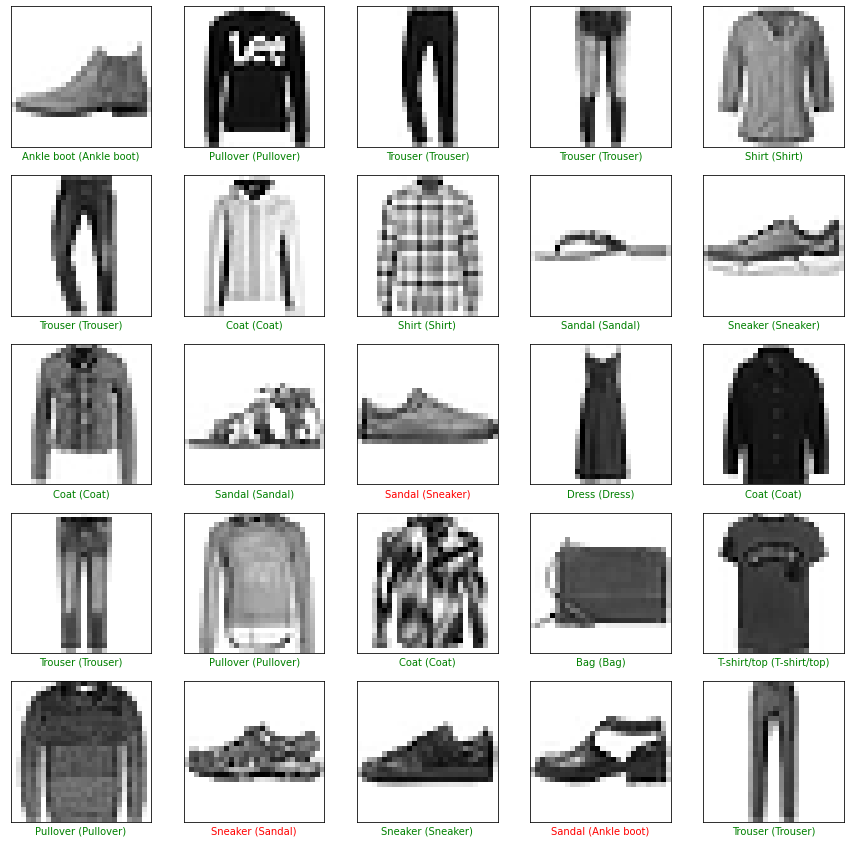

In [7]:
#类别名称
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']
#绘制前25个样本的预测结果，正确为绿色，不正确为红色
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(Predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    #前面是预测分类，括号内是实际分类
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
               color=color)
plt.show()